# Introduction
This example demonstrates [TerraClimate](https://developers.google.com/earth-engine/datasets/catalog/IDAHO_EPSCOR_TERRACLIMATE) dataset -- monthly from 1958-2020 (see reference for details) and processing tools for that developed by [A. Lukashevich](https://www.researchgate.net/profile/Aleksandr-Lukashevich)

In [7]:
import sys
import os
import src.data_processing as dp
from src.utils import *
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt

In [10]:
for i in range(2006, 2007):
    print(i)

2006


In [11]:
target = dp.get_target((2006, 2007))
test_dl = dp.get_testdl((2006, 2007), "mean_2m_air_temperature", "data/Tambov")

In [9]:
target

,target
2006-01-01,0
2006-02-01,0
2006-03-01,0
2006-04-01,0
2006-05-01,0
2006-06-01,0
2006-07-01,0
2006-08-01,0
2006-09-01,0
2006-10-01,0


# Determining data files

In [5]:
feature_names = ['mean_2m_air_temperature']#, 'tmax', 'tmin', 'pr', 'ws', 'vap']
numpys = dp.get_nps(feature_names, 'data/Tambov/2001/*.tif') #location for .tif files -- geo data -- saved at your google drive
#numpys2 = dp.get_nps(feature_names, 'data/Tambov/2007/*.tif')
#pdsi = numpys['pdsi']
tmean = numpys['mean_2m_air_temperature']
#sp= numpys['surface_pressure']
#pr = numpys['pr']
#ws = numpys['ws']
#vap = numpys['vap']

# Dataset demonstration


In [15]:
np.concatenate((tmean, tmean2), axis = 0).shape

(24, 234, 346)

## Dimensions

In [6]:
print("Number of dimensions: ", len(tmean.shape))
print("First dimension: time - ", tmean.shape[0], " - months")
print("Second dimension: longtitude - ", tmean.shape[1], " - pixels (points)")
print("Third dimension: latitude - ", tmean.shape[2], " - pixels (points)")

Number of dimensions:  3
First dimension: time -  12  - months
Second dimension: longtitude -  234  - pixels (points)
Third dimension: latitude -  346  - pixels (points)


# Plot January of 1958

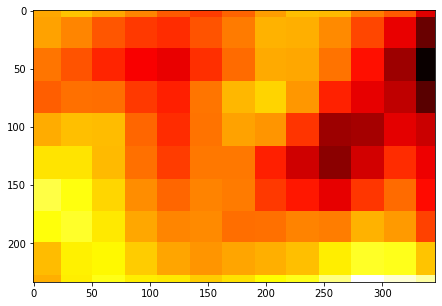

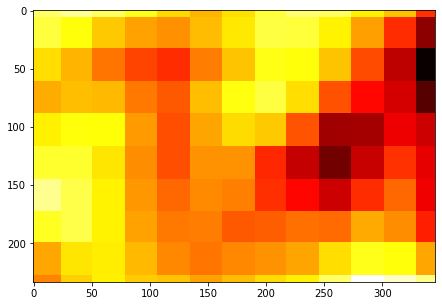

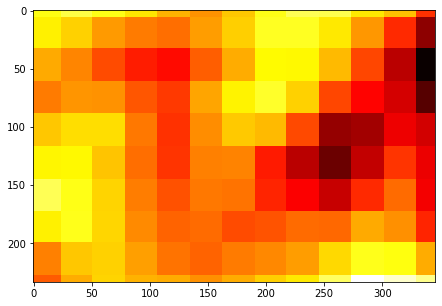

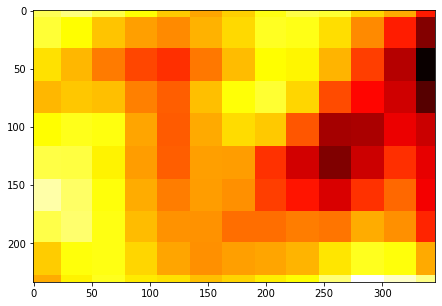

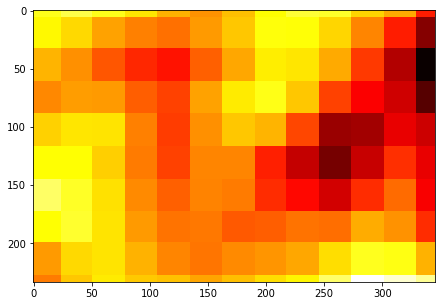

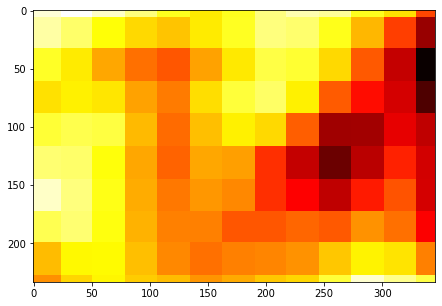

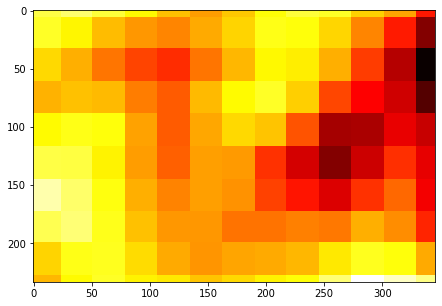

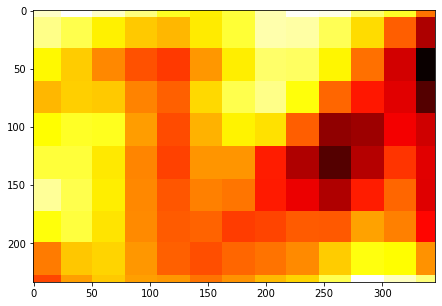

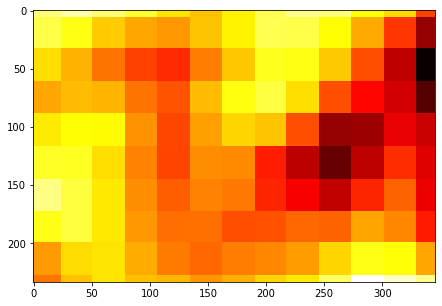

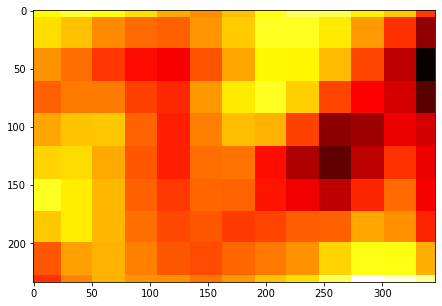

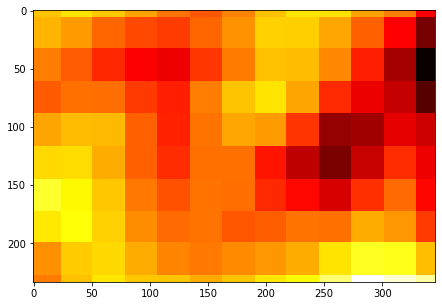

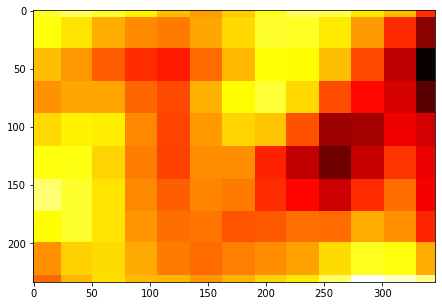

In [6]:
for i in range(12):
    plt.figure(figsize=(10, 5))
    plt.imshow(sp[i], cmap='hot', interpolation='nearest')
    plt.show()

# Plot time series of temperature at some pixel

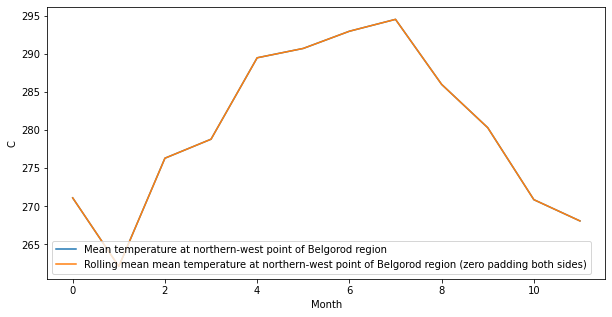

In [7]:
plt.figure(figsize=(10, 5))
tmean_timeseries = tmean[:, 0, 0]
plt.plot(tmean_timeseries, label='Mean temperature at northern-west point of Belgorod region')
w = 1
tmean_ts_rolling_mean = np.convolve(tmean_timeseries, np.ones(w), mode='same') / w
plt.plot(tmean_ts_rolling_mean, label='Rolling mean mean temperature at northern-west point of Belgorod region (zero padding both sides)')
plt.xlabel("Month")
plt.ylabel("C")
plt.legend()
plt.show()
